In [1]:
from road_rage import *
%matplotlib inline

# Normal Mode

In [8]:
itr = 100
min_speed = 20
max_speed = 120
speed_range = range(min_speed, max_speed)
all_speeds = np.array([])
all_locations = np.array([])
all_speeds.resize(len(speed_range), itr, 61, 30)
all_locations.resize(len(speed_range), itr, 61, 30)
for sp in speed_range:
    for i in range(itr):
        speeds = Simulation(sp).run_sim()
#        speeds, locations = Simulation(sp).run_sim()
        all_speeds[sp-min_speed][i] = speeds
#        all_locations[sp-min_speed][i] = locations

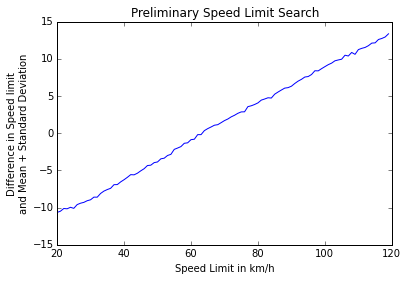

In [10]:
plt.plot(speed_range, ([spd*1000/3600 for spd in speed_range] - (np.mean(all_speeds, (3, 2, 1)) + np.std(all_speeds, (3, 2, 1)))))
plt.xlabel("Speed Limit in km/h")
plt.title("Preliminary Speed Limit Search")
plt.ylabel("Difference in Speed limit\nand Mean + Standard Deviation")
plt.show()

## First Trials

Here we are using data from a wide range of possible speed limits.  With the stipulation that the ideal speed limit is one standard deviation higher than the mean speed, we are searching for where difference between the speed limit and the sum of the mean and standard deviation are as close to zero as possible.  With this in mind and with the data on our graph, see that that difference of zero occurs somewhere around 60 km/h, so we will run it again with a smaller window and a higher number of iterations.

In [11]:
itr = 1000
min_speed = 55
max_speed = 66
speed_range = range(min_speed, max_speed)
all_speeds = np.array([])
all_locations = np.array([])
all_speeds.resize(len(speed_range), itr, 61, 30)
all_locations.resize(len(speed_range), itr, 61, 30)
for sp in speed_range:
    for i in range(itr):
        speeds = Simulation(sp).run_sim()
#        speeds, locations = Simulation(sp).run_sim()
        all_speeds[sp-min_speed][i] = speeds
#        all_locations[sp-min_speed][i] = locations

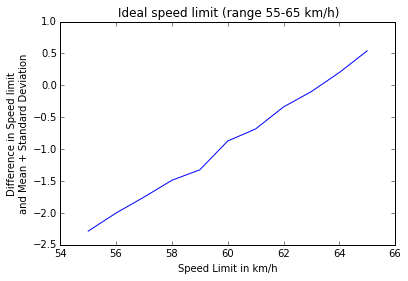

In [12]:
plt.plot(speed_range, ([spd*1000/3600 for spd in speed_range] - (np.mean(all_speeds, (3, 2, 1)) + np.std(all_speeds, (3, 2, 1)))))
plt.title("Ideal speed limit (range 55-65 km/h)")
plt.xlabel("Speed Limit in km/h")
plt.ylabel("Difference in Speed limit\nand Mean + Standard Deviation")
plt.show()

## Further narrowing

Our ideal speed limit appears to be around 63 km/h.  Let's try again looking between 62 and 64 km/h with an even higher iteration count.

In [13]:
itr = 5000
min_speed = 62
max_speed = 65
speed_range = range(min_speed, max_speed)
all_speeds = np.array([])
all_locations = np.array([])
all_speeds.resize(len(speed_range), itr, 61, 30)
all_locations.resize(len(speed_range), itr, 61, 30)
for sp in speed_range:
    for i in range(itr):
        speeds = Simulation(sp).run_sim()
#        speeds, locations = Simulation(sp).run_sim()
        all_speeds[sp-min_speed][i] = speeds
#        all_locations[sp-min_speed][i] = locations

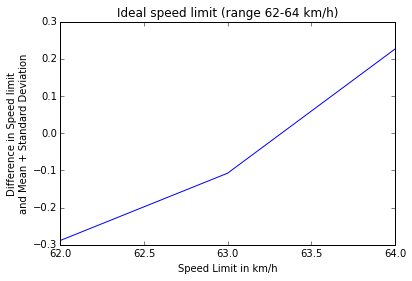

In [14]:
plt.plot(speed_range, ([spd*1000/3600 for spd in speed_range] - (np.mean(all_speeds, (3, 2, 1)) + np.std(all_speeds, (3, 2, 1)))))
plt.title("Ideal speed limit (range 62-64 km/h)")
plt.xlabel("Speed Limit in km/h")
plt.ylabel("Difference in Speed limit\nand Mean + Standard Deviation")
plt.show()

## Results

63 km/h still appears to be our ideal speed limit for this kilometer of road.  Let's visualize this by comparing samples of drivers trying to go their ideal 120 km/s with our ideal 63 km/h

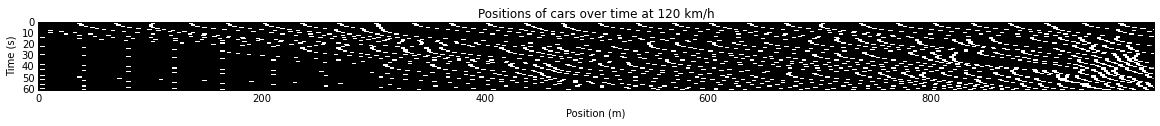

In [26]:
# get your data in an np.array, make sure the type is float32 using .astype('float32')
loc_data120 = SimLoc(120).run_sim()
img_data120 = np.zeros((61, 1000))
for tick in range(len(loc_data120)):
    for loc in loc_data120[tick]:
        img_data120[tick][int(loc//1):int(loc//1+4)] = 1
plt.figure(figsize=(20, 20)) # size is in "inches"
plt.title("Positions of cars over time at 120 km/h")
plt.xlabel("Position (m)")
plt.ylabel("Time (s)")
plt.imshow(img_data120, cmap='gray', interpolation='nearest')
plt.show()

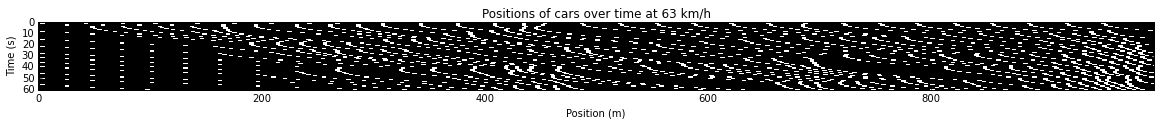

In [28]:
# get your data in an np.array, make sure the type is float32 using .astype('float32')
loc_data63 = SimLoc(63).run_sim()
img_data63 = np.zeros((61, 1000))
for tick in range(len(loc_data63)):
    for loc in loc_data63[tick]:
        img_data63[tick][int(loc//1):int(loc//1+4)] = 1

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.title("Positions of cars over time at 63 km/h")
plt.xlabel("Position (m)")
plt.ylabel("Time (s)")
plt.imshow(img_data63, cmap='gray', interpolation='nearest')
plt.show()

## Normal Mode: Results

At 63 km/h, we still see a few cars stop, but not nearly as many as at 120 km/h.  Overall, traffic is mostly matching the speed of the car in front of it and carrying on.

In [ ]:
print(4.5//1)

In [3]:
sim1 = Simulation(120)

In [4]:
print(len(sim1.road.vehicles))

30


In [5]:
sim1.tick()

In [6]:
print(len(sim1.road.vehicles))

30


In [7]:
sim1.tick()
print(len(sim1.road.vehicles))

30
